<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            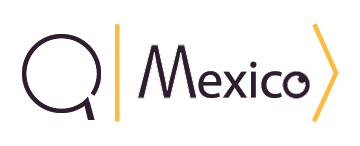
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Qiskit Machine Learning</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Claudia Zendejas-Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
   1. [¿Una máquina aprende?](#intro.1)
   2. [Definición de Machine Learning](#intro.2)
   3. [Quantum Machine Learning](#intro.3)
   4. [Redes Neuronales](#intro.4)
2. [Modelos de Clasificación y Regresión](#secc1)
   1. [Modelo de Clasificación](#secc1.1)
   2. [Modelo de Regresión](#secc1.2)
3. [Solución con Qiskit](#secc2)
   1. [Clasificación](#secc2.1)
      1. [Clase `OpflowQNN`](#secc2.1.1)
      2. [Clase `CircuitQNN`](#secc2.1.2)
      3. [Clasificador Cuántico Variacional `VQC`](#secc2.1.3)
   2. [Regresión](#secc2.2)
      1. [Clase `OpflowQNN`](#secc2.2.1)
      2. [Regresor Cuántico Variacional `VQR`](#secc2.2.2)
4. [Referencias](#secc3)

<a id="intro"></a>
# Introducción

En los últimos veinte años hemos sido testigos de una explosión en la disponibilidad de grandes cantidades de datos, así como del interés en aplicaciones estadísticas y de Machine Learning para explotar estos datos. El impacto ha sido profundo.

Esta demanda es dirigida por un simple, pero innegable hecho, los resultados a los que nos ha permitido acceder no habían sido vistos antes. El enfoque del Machine Learning ha producido nuevas perspectivas signficativas, nuevas maneras de analizar y aprovechar los datos que generamos todos los días, esto sucede en diferentes campos, como las ciencias sociales, negocios, biología, medicina, procesamiento de imagenes, entre muchos otros.

La traducción de Machine Learning suele ser _aprendizaje automatizado_ o _aprendizaje de máquinas_, sin embargo, suele encontrarse mayormente el término en inglés, por lo que en este notebook así lo utilizamos.

<a id="intro.1"></a>
## ¿Una máquina aprende?

Mencionémoslo como lo que es, las máquinas **no** aprenden. Lo que una "máquina de aprendizaje" típica hace, es encontrar una fórmula matemática, la cual, cuando es aplicada a una colección de entradas (llamadas _datos de entrenamiento_), produce una salida deseada. Esta misma fórmula matemática también genera las salidas correctas para la mayoría de las entradas (distintas de los datos de entrenamiento) bajo la condición de que esas otras entradas vengan de la misma o de una distribución estadística similar, como la definen los datos de entrenamiento.

¿Por qué eso no es aprender? Porque si modificas ligeramente las entradas, muy probablemente la salida se vuelve completamente diferente. Esto no es como funciona el aprendizaje en animales. Si aprendes a jugar un videojuego solamente al observar directo a la pantalla, podrías llegar a ser un buen jugador, incluso si alguien más rota ligeramente la pantalla.

En cambio un algoritmo de Machine Learning, si fuera entrenado por "observar" directo a una pantalla, fallará al jugar el videojuego en una pantalla rotada (a menos que haya sido entrenado para reconocer rotaciones de pantalla).

Entonces, ¿por qué el nombre de "Machine Learning" (_aprendizaje de máquinas_)? La razón, como sucede en muchas ocasiones, es el _marketing_: [Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel), un pionero en el campo de juegos de computadora y la inteligencia artificial, acuñó el término en 1959 mientras era parte de IBM. De manera similar como cuando IBM en la década de 2010s intentó introducir el término "[computación cognitiva](http://publicservicesalliance.org/wp-content/uploads/2015/10/Computing_Cognition_WhitePaper.pdf)" para diferenciarse de la competencia, en los años 1960s, IBM usó el nuevo término llamativo _Machine Learning_ para atraer tanto a clientes como a empleados talentosos.

Como puedes ver, justo como con la inteligencia artificial que no es inteligente, la _máquina de aprendizaje_ no aprende. Sin embargo, Machine Learning es un término universalmente reconocido que usualmente se refiere a la ciencia e ingeniería de construir máquinas capaces de hacer varias cosas útiles sin estar explícitamente programadas para ello. Por lo que la palabra "learning" (_aprendizaje_) es el término que se usa por analogía con el aprendizaje en animales en lugar de literalmente.

<a id="intro.2"></a>
## Definición de Machine Learning

El Machine Learning está definido como un subcampo de la ciencia de la computación, que está centrado en construir algoritmos útiles, que dependen de una colección de ejemplos de algún fenómeno. Estos ejemplos pueden venir de la naturaleza, ser definidos por humanos o ser generados por otros algoritmos.

También puede ser definido como el proceso de resolver un problema práctico al reunir un conjunto de datos y al construir algorítmicamente un modelo estadístico basado en un conjunto de datos. Ese modelo estadístico será usado de alguna manera para resolver el problema particular.

<a id="intro.3"></a>
## Quantum Machine Learning

El Quantum Machine Learning es un área de investigación que explora la interacción de ideas de la computación cuántica y el _aprendizaje automático_.

El uso más común del término se refiere a algoritmos de Machine Learning para el análisis de datos clásicos ejecutados en una computadora cuántica, es decir, Machine Learning mejorado cuánticamente. Mientras que los algoritmos de Machine Learning se utilizan para calcular inmensas cantidades de datos, el Quantum Machine Learning utiliza qubits y operaciones cuánticas o sistemas cuánticos especializados para mejorar la velocidad computacional y el almacenamiento de datos realizado por algoritmos en un programa. Esto incluye métodos híbridos que involucran tanto procesamiento clásico como cuántico, donde subrutinas computacionalmente difíciles se delegan a un dispositivo cuántico.

El Quantum Machine Learning también se extiende a una rama de la investigación que explora las similitudes metodológicas y estructurales entre ciertos sistemas físicos y sistemas de aprendizaje, en particular las redes neuronales. Por ejemplo, algunas técnicas matemáticas y numéricas de la física cuántica son aplicables al [Deep Learning](https://en.wikipedia.org/wiki/Deep_learning) clásico y viceversa. Además, los investigadores trabajan con nociones más abstractas de la teoría del aprendizaje con respecto a la información cuántica, a veces denominada [Teoría del Aprendizaje Cuántico](https://qutech.nl/wp-content/uploads/2018/01/QIP18MLtutorial_Ronald-de-Wolf.pdf).

<a id="intro.4"></a>
## Redes Neuronales

En los últimos 10 años, los sistemas de inteligencia artificial de mejor rendimiento, como los reconocedores de voz en los teléfonos inteligentes o el último traductor automático de Google, son el resultado del _Deep Learning_.

El _Deep Learning_ es, de hecho, un nuevo nombre para un enfoque de la inteligencia artificial llamado **Redes Neuronales**, estas se inspiran en el proceso de aprendizaje que ocurre en el cerebro humano. Consisten en una red artificial de funciones, que permiten que la computadora "aprenda" y se ajuste a sí misma mediante el análisis de nuevos datos.

Cada función, a veces también denominada neurona (o función de activación), produce una salida después de recibir una o varias entradas. Luego, esas salidas se pasan a la siguiente capa de neuronas, que las utilizan como entradas de su propia función y producen más salidas. Después, esas salidas pasan a la siguiente capa de neuronas, y así continúa hasta que se han considerado todas las capas de neuronas y las neuronas finales han recibido su entrada. A continuación, esas neuronas finales generan el resultado del modelo.

Si lo escribimos en forma de funciones, la manera es indicando una serie de funciones anidadas, también llamada [composición de funciones](https://es.wikipedia.org/wiki/Funci%C3%B3n_compuesta), así por ejemplo, una red neuronal de 3 capas que regresa los resultados en el vector $\vec{y}$ se puede expresar como:

$$\vec{y} = f_{NN}\left(\vec{x}\right)=f_3\left(f_2\left(f_1\left(\vec{x}\right)\right)\right)$$


Una red neuronal consta de unidades (neuronas), dispuestas en capas, que convierten un vector de entrada en una salida. Cada unidad toma una entrada, le aplica una función (a menudo no lineal) y luego pasa la salida a la siguiente capa. Por lo general, las redes se definen como _[feed-forward](https://es.wikipedia.org/wiki/Red_neuronal_prealimentada)_: una unidad alimenta su salida a todas las unidades en la siguiente capa, pero no hay retroalimentación a la capa anterior. Las ponderaciones se aplican a las señales que pasan de una unidad a otra, y son estas ponderaciones las que se sintonizan en la fase de entrenamiento para adaptar una red neuronal al problema particular en cuestión. Esta es la fase de aprendizaje. Se puede apreciar en la siguiente imagen este proceso.

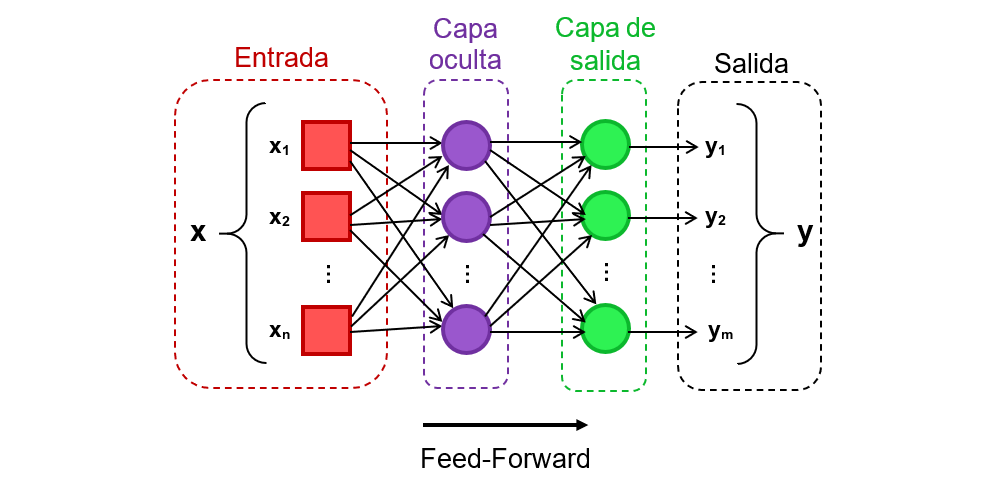

Las redes neuronales son una manera de hacer Machine Learning, en el que una computadora "aprende" a realizar una tarea mediante el análisis de ejemplos de entrenamiento, generalmente estos ejemplos se etiquetan a mano con anticipación. Un sistema de reconocimiento de objetos, por ejemplo, se podría alimentar de miles de imágenes etiquetadas de automóviles, casas, tazas de café, etc., y encontraría patrones visuales en las imágenes que se correlacionan consistentemente con etiquetas particulares.

<a id="secc1"></a>
# Modelos de Clasificación y Regresión

Un modelo busca representar una situación real por algo que sea posible manipular de manera más sencilla usando numerosas variables que caracterizan al sistema bajo estudio.

<a id="secc1.1"></a>
## Modelo de Clasificación

La clasificación es el proceso de predecir a qué categoría pertenecen los datos dados. Las categorías también se denominan clases, objetivos o etiquetas. El modelado predictivo de clasificación es la tarea de aproximar una función de mapeo de las variables de entrada a las variables de salida discretas.

Por ejemplo, al contestar estas preguntas estamos resolviendo problemas de clasificación:
- ¿Este correo electrónico es spam o no?
- ¿Este producto es un libro, una película o una prenda de vestir?
- ¿Es esta película una comedia romántica, un documental o una película de acción?

<a id="secc1.2"></a>
## Modelo de Regresión

La regresión se refiere a problemas de modelado predictivo que implica predecir un valor numérico dado un conjunto de entradas. El objetivo del modelo de regresión es construir una ecuación matemática que defina la salida como una función de las variables de entrada. Posteriormente, esta ecuación se puede utilizar para predecir el resultado de nuevos valores de entrada.

Por ejemplo, al contestar estas preguntas estamos resolviendo problemas de regresión:
- ¿Cuál será la temperatura en Cancún mañana?
- Para este producto, ¿cuántas unidades se venderán?
- ¿A qué precio se venderá esta casa?

<a id="secc2"></a>
# Solución con Qiskit

Qiskit nos proporciona una serie de clases que nos ayudan a resolver problemas con los modelos de clasificación y regresión, las cuales son `NeuralNetworkClassifier` y `NeuralNetworkRegressor`.

Ambas clases toman como entrada una red neuronal (cuántica) y la utilizan dependiendo del contexto específico. En ambos casos se debe proporcionar un objeto variacional preconfigurado para mayor comodidad, el Clasificador Cuántico Variacional (Variational Quantum Classifier, `VQC`) y el Regresor Cuántico Variacional (Variational Quantum Regressor, `VQR`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

Usemos el `aer_simulator` para ejecutar nuestros experimentos, creamos un `QuantumInstance` para almacenar la configuración de ejecución que estamos definicendo aquí:

In [2]:
quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

<a id="secc2.1"></a>
## Clasificación

Preparamos un conjunto de datos de clasificación simple, generando $20$ valores muestra, cada uno una tupla $(x_1,x_2)$ y definiendo su resultado $y$ dependiendo de si su suma es mayor a $0$ o no, asignando $\{1,0\}$ respectivamente.

En la variable `y_one_hot` se guarda la codificación [one-hot](https://en.wikipedia.org/wiki/One-hot).

En la variable `y` se reetiquetan las muestras con valores $\{-1,+1\}$, los cuales son usados para decidir de qué color se mostrará la muestra en la gráfica, los valores con la etiqueta $+1$ son los que están por encima de la línea $x=-y$ y los de etiqueta $-1$ son los que están por debajo de dicha línea.

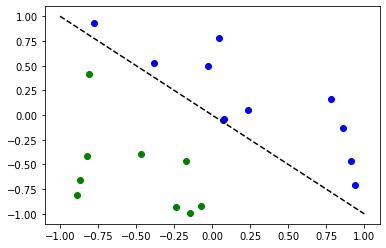

In [3]:
num_inputs = 2                                             # cantidad de entradas (primera capa de la red neuronal)

num_samples = 20                                           # cantidad de muestras para entrenar la red neuronal

X = 2*np.random.rand(num_samples, num_inputs) - 1          # de manera aleatoria creamos lo valores que entran a la capa 1
                                                           # estos son dos valores (inputs) por cada muestra

y01 = 1*(np.sum(X, axis=1) >= 0)                           # si la suma de los dos valores (de cada muestra) es >= 0
                                                           # (es decir, están arriba de la línea x=-y en el plano)
                                                           # entonces lo clasificamos con la etiqueta '1', caso contrario
                                                           # con la etiqueta '0', así los valores de y01 ∈ {0,1}
                                                           

y = 2*y01-1                                                # en esta variable reetiquetamos con: y ∈ {-1,+1}

y_one_hot = np.zeros((num_samples, 2))                     # variable para la codificación one-hot

for i in range(num_samples):                               # generamos los valores one-hot de cada muestra usando y01
    y_one_hot[i, y01[i]] = 1                               # si el valor en y01[i] = 0, entonces y_one_hot_i = [1,0]
                                                           # pero si y01[i] = 1, entonces y_one_hot_i = [0,1]

    
for x, y_target in zip(X, y):                              # iteramos sobre las muestras y sus respectivos resultados
    if y_target == 1:                                      # si se trata de una muestra con resultado etiquetado con '+1'
        plt.plot(x[0], x[1], 'bo')                         # la dibujamos en azul
    else:                                                  # si la muestra tiene un resultado con la etiqueta '-1'
        plt.plot(x[0], x[1], 'go')                         # entonces la dibujamos en verde


plt.plot([-1, 1], [1, -1], '--', color='black')            # definimos el plot con la línea x = -y
plt.show()                                                 # mostramos el plot

<a id="secc2.2.1"></a>
### Clase `OpflowQNN`

Primero mostramos cómo se puede usar la clase `OpflowQNN` para la clasificación dentro de un `NeuralNetworkClassifier`. En este contexto, se espera que `OpflowQNN` devuelva una salida unidimensional en el formato $\left[-1,+1\right]$. Esto solo funciona para la clasificación binaria y le asignamos las dos clases a $\{-1,+1\}$. Para mayor comodidad, utilizamos `TwoLayerQNN`, que es un tipo especial de `OpflowQNN` definido a través de un [mapa de características](https://computersciencewiki.org/index.php/Feature_maps_(Activation_maps)) y un [ansatz](https://en.wikipedia.org/wiki/Ansatz).

In [4]:
# considera que esta celda puede tardar en ejecutarse


# construir la QNN (Quantum Neural network)
opflow_qnn = TwoLayerQNN(num_inputs, quantum_instance = quantum_instance)


# la QNN mapea las entradas a [-1, +1]
opflow_qnn.forward(X[0, :], np.random.rand(opflow_qnn.num_weights))


# construir el clasificador de red neuronal
opflow_classifier = NeuralNetworkClassifier(opflow_qnn, optimizer = COBYLA())


# ajustar el clasificador a los datos
opflow_classifier.fit(X, y)


# calificar (score) al clasificador
opflow_classifier.score(X, y)

0.8

Este último número nos indica que tan buen ajuste se pudo hacer a los datos de las muestras.

Ahora grafiquemos los datos nuevamente, pero indicando cuáles fueron mal clasificados.

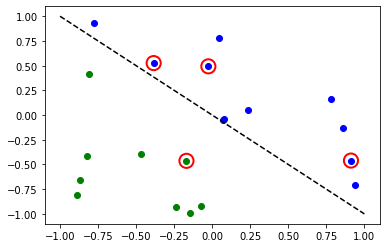

In [5]:
# evaluar los datos
y_predict = opflow_classifier.predict(X)                         # obtenemos las predicciones para todas las muestras



# grafcar resultados
# rojo == clasificado incorrectamente

for x, y_target, y_p in zip(X, y, y_predict):                    # iteramos sobre todas las muestras
    if y_target == 1:                                            # si estaba clasificada con '+1'
        plt.plot(x[0], x[1], 'bo')                               # la dibujamos en azul
    else:                                                        # si estaba clasificada con '-1'
        plt.plot(x[0], x[1], 'go')                               # la dibujamos en verde
    if y_target != y_p:                                          # si la predicción es diferente a la etiqueta
                                                                 # colocamos un círculo rojo alrededor
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)


plt.plot([-1, 1], [1, -1], '--', color='black')                  # definimos el plot con la línea x = -y
plt.show()                                                       # mostramos el plot

<a id="secc2.1.2"></a>
### Clase `CircuitQNN`

A continuación, mostramos cómo se puede utilizar la clase `CircuitQNN`, la cual devolverá un vector de probabilidad de dimensión $d$ como salida, donde $d$ denota el número de clases (clasificaciones). El muestreo de un `QuantumCircuit` da como resultado automáticamente una distribución de probabilidad y solo necesitamos definir un mapeo de las cadenas de bits medidas a las diferentes clases. Para la clasificación binaria usamos el mapeo de paridad.

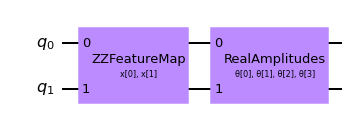

In [6]:
# construir mapa de características
feature_map = ZZFeatureMap(num_inputs)


# construir el ansatz
ansatz = RealAmplitudes(num_inputs, reps=1)


# construir el circuito cuántico
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose().draw(output='mpl')

In [7]:
# veamos el detalle del mapa de características
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


In [8]:
# veamos el detalle del ansatz
print(ansatz)

     ┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├
     ├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├
     └──────────┘└───┘└──────────┘


In [9]:
# la paridad asigna cadenas de bits de 0 a 1
def parity(x):
    return '{:b}'.format(x).count('1') % 2

output_shape = 2  # corresponde al número de clases, posibles resultados del mapeo (de paridad)

In [10]:
# considera que esta celda puede tardar en ejecutarse


# construir la  QNN (Quantum Neural Network)
circuit_qnn = CircuitQNN(circuit=qc,
                         input_params=feature_map.parameters,
                         weight_params=ansatz.parameters,
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=quantum_instance)


# construir el clasificador
circuit_classifier = NeuralNetworkClassifier(neural_network=circuit_qnn, optimizer=COBYLA())


# ajustar el clasificador a los datos
circuit_classifier.fit(X, y01)


# calificar (score) al clasificador
circuit_classifier.score(X, y01)

0.7

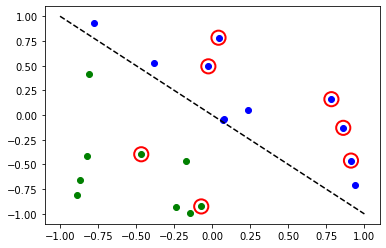

In [11]:
# evaluar los datos
y_predict = circuit_classifier.predict(X)                        # obtenemos las predicciones para todas las muestras



# grafcar resultados
# rojo == clasificado incorrectamente

for x, y_target, y_p in zip(X, y01, y_predict):                  # iteramos sobre todas las muestras
    if y_target == 1:                                            # si estaba clasificada con '+1'
        plt.plot(x[0], x[1], 'bo')                               # la dibujamos en azul
    else:                                                        # si estaba clasificada con '-1'
        plt.plot(x[0], x[1], 'go')                               # la dibujamos en verde
    if y_target != y_p:                                          # si la predicción es diferente a la etiqueta
                                                                 # colocamos un círculo rojo alrededor
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)


plt.plot([-1, 1], [1, -1], '--', color='black')                  # definimos el plot con la línea x = -y
plt.show()                                                       # mostramos el plot

<a id="secc2.1.3"></a>
### Clasificador Cuántico Variacional (Variational Quantum Classifier) `VQC`

La clase `VQC` es una variante especial del `NeuralNetworkClassifier` con un `CircuitQNN`. Aplica un mapeo de paridad (o extensiones para múltiples clases) para mapear desde la cadena de bits hasta la clasificación, lo que da como resultado un vector de probabilidad, que se interpreta como un resultado codificado con _one-hot_. De forma predeterminada, aplica la función `CrossEntropyLoss` que espera que las etiquetas se proporcionen en formato de codificación _one-hot_ y también devolverá predicciones en ese formato.

In [12]:
# considera que esta celda puede tardar en ejecutarse


# construir mapa de características
feature_map = ZZFeatureMap(num_inputs)

# construir un ansatz
ansatz = RealAmplitudes(num_inputs, reps=1)


# construir un clasificador cuántico variacional
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          loss='cross_entropy',
          optimizer=COBYLA(),
          quantum_instance=quantum_instance)


# ajustar el clasificador a los datos
vqc.fit(X, y_one_hot)


# calificar (score) al clasificador
vqc.score(X, y_one_hot)

0.9

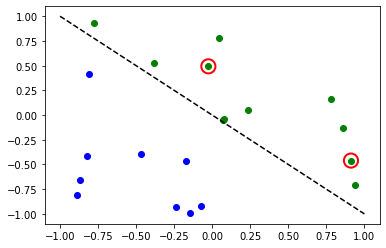

In [13]:
# evaluar los datos
y_predict = vqc.predict(X)                                       # obtenemos las predicciones para todas las muestras



# grafcar resultados
# rojo == clasificado incorrectamente

for x, y_target, y_p in zip(X, y_one_hot, y_predict):            # iteramos sobre todas las muestras
    if y_target[0] == 1:                                         # si estaba clasificada con '+1'
        plt.plot(x[0], x[1], 'bo')                               # la dibujamos en azul
    else:                                                        # si estaba clasificada con '-1'
        plt.plot(x[0], x[1], 'go')                               # la dibujamos en verde
    if not np.all(y_target == y_p):                              # si la predicción es diferente a la etiqueta
                                                                 # colocamos un círculo rojo alrededor
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)


plt.plot([-1, 1], [1, -1], '--', color='black')                  # definimos el plot con la línea x = -y
plt.show()                                                       # mostramos el plot

<a id="secc2.2"></a>
## Regresión

Preparamos un conjunto de datos de regresión simple para ilustrar los siguientes algoritmos.

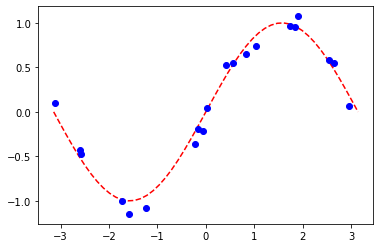

In [14]:
num_samples = 20                                           # cantidad de muestras para entrenar la red neuronal

eps = 0.2                                                  # valor de tolerancia (epsilon)

lb, ub = -np.pi, np.pi                                     # limites inferior y superior

X_ = np.linspace(lb, ub, num=50).reshape(50, 1)            # generar 50 números en el intervalo (lb, ub) para graficar f

f = lambda x: np.sin(x)                                    # función lambda que calcula el seno

X = (ub - lb)*np.random.rand(num_samples, 1) + lb          # generar 20 (num_samples) muestras de forma alaeatoria
                                                           # pero en el intervalo (lb, ub)

y = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)      # generar los resultados (vector 'y') aleatoriamente
                                                           # pero siguiendo una función seno, y con tolerancia de 'eps'
                                                           # es decir, ± 0.2 alrededor de la función seno

plt.plot(X_, f(X_), 'r--')                                 # graficar la función f (seno), usando los 50 puntos en _X   
plt.plot(X, y, 'bo')                                       # graficar la muestras
plt.show()                                                 # mostrar gráfica

<a id="secc2.2.1"></a>
### Clase `OpflowQNN`

Aquí nos restringimos a la regresión con un objeto `OpflowQNN` que devuelve valores en $[-1,+1]$. Se podrían construir modelos más complejos y también multidimensionales, también basados en `CircuitQNN` pero eso excede el alcance de este notebook.

In [15]:
# considera que esta celda puede tardar en ejecutarse


# construir mapa de características
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)


# construir un ansatz simple
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)


# construir la  QNN (Quantum Neural Network)
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)


# construir el regresor de red neuronal
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn,
                                   loss='l2',
                                   optimizer=L_BFGS_B())

# ajustar los datos al regresor
regressor.fit(X, y)


# calificar (score) el resultado
regressor.score(X, y)

0.9812045779663654

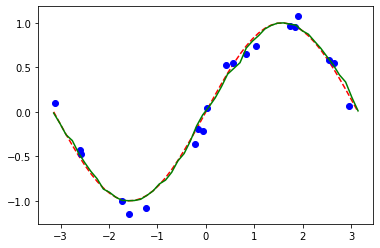

In [16]:
# graficar la función objetivo
plt.plot(X_, f(X_), 'r--')

# graficar los datos
plt.plot(X, y, 'bo')

# graficar la línea ajustada
y_ = regressor.predict(X_)
plt.plot(X_, y_, 'g-')
plt.show()

<a id="secc2.2.2"></a>
### Regresor Cuántico Variacional (Variational Quantum Regressor) `VQR`

Similar al `VQC` para la clasificación, el `VQR` es una variante especial del `NeuralNetworkRegressor` con un `OpflowQNN`. De forma predeterminada, considera la función `L2Loss` para minimizar el error cuadrático medio entre las predicciones y los objetivos.

In [17]:
# considera que esta celda puede tardar en ejecutarse


# construir un regresor cuántico variacional
vqr = VQR(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=L_BFGS_B(),
          quantum_instance=quantum_instance)


# ajustar el regresor
vqr.fit(X, y)

# calificar (score) el resultado
vqr.score(X, y)

0.9836375761207824

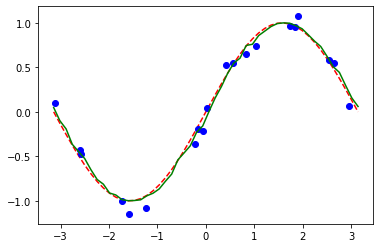

In [18]:
# graficar la función objetivo
plt.plot(X_, f(X_), 'r--')

# graficar los datos
plt.plot(X, y, 'bo')

# graficar la línea ajustada
y_ = vqr.predict(X_)
plt.plot(X_, y_, 'g-')
plt.show()

<a id="secc3"></a>
# Referencias

- [1] Andriy Burkov. The Hundred-Page Machine Learning Book. 2019. ISBN: 978-1-9995795-0-0
- [2] IBM Cloud Learn Hub. Machine Learning. Consultado en https://www.ibm.com/cloud/learn/machine-learning
- [3] AWS Docs. Types of ML Models. Consultado en https://docs.aws.amazon.com/machine-learning/latest/dg/types-of-ml-models.html
- [4] STHDA. Regression Analysis Essentials For Machine Learning. http://www.sthda.com/english/wiki/regression-analysis-essentials-for-machine-learning
- [5] Sidath Asiri. Machine Learning Classifiers.Consultado en https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
- [6] Qiskit Development Team. Qiskit Tutorials: Neural Network Classifier & Regressor. Consultado en https://qiskit.org/documentation/machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: left;">
            <a href="03_Nature.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                &lt;&lt; Notebook anterior: 03_Nature
            </a>
            </div>
        </td>
    </tr>
</table>